In [1]:
# Graph sensor observations for K-State testbeds
# AP - Novemeber 2022


In [55]:
# Import modules
import glob


In [75]:
# Get dictionary with unique variables and units
testbed = 'Kansas_State_University'
logger = 'CR300-10553'
files = glob.glob(f"../data/{testbed}/*{logger}*.dat")

In [67]:
for file in files:
    df = pd.read_csv

'/Users/andrespatrignani/Soil Water Lab Dropbox/Andres Patrignani/Soil_Water_Lab/Testbed/mist/python_notebooks'

In [8]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact


In [49]:
metadata = {'Kansas_State_University':{
            'sites':{'1':'CR300-23667', '2':'CR300-10553', '3':'CR300-23666'},
            'other_sensors':['Batt','TE525MM'],
            'sensors':{'Acclima':{'depths':['5','20','40'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'CS655':{'depths':['5','20','40'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'DrillDrop':{'depths':['5','15','25','35','45'],'variables':['VWC','TEMP','sal','PERM']}},
                      {'GroPoint':{'depths':['5_15','10','20','30','40','50'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'SoilVue':{'depths':['5','10','20','30','40','50'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'Hydraprobe':{'depths':['5','20','40'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'Thetaprobe':{'depths':['5','20','40'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'Teros12':{'depths':['5','20','40'],'variables':['VWC','TEMP','EC','PERM']}},
                      {'Teros21':{'depths':['5','20','40'],'variables':['VWC','TEMP','EC','PERM']}}
           }


In [54]:
def load_site(testbed,site,sensor,variable,start_date,end_date=None):
    
    # Convert string to datetime format
    start_date = pd.to_datetime(start_date)
    
    if end_date is not None:
        end_date = pd.to_datetime(end_date)
    
    # Root URL for the repository data
    root = f"https://raw.githubusercontent.com/soilwater/mist/main/data/{testbed}"
    folder = metadata[testbed]['sites'][site]
    df = pd.read_csv(f'{root}/{folder}_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")

    # Read units from one of the sites
    units = pd.read_csv(f'{root}/{folder}_Table_{sensor}.dat', skiprows=1, nrows=1, na_values="NAN").iloc[0].values
    
    # Trim dates
    if end_date is None:
        idx = df['TIMESTAMP'] >= start_date
    else:
        idx = (df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date)

    df = df[idx].reset_index(drop=True)
    
    columns = df.columns
    query = f"{sensor}_{variable}"
    idx_col = query in
    df = df[["TIMESTAMP",query]]
    return df
    

SyntaxError: invalid syntax (1587482761.py, line 27)

KeyError: "['GroPoint_VWC_5_Avg'] not in index"

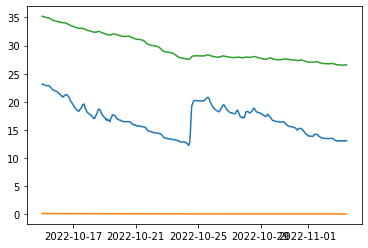

In [52]:
testbed = 'Kansas_State_University'
site = '1'
sensor = 'Acclima'
variable = 'VWC'
depth = '5'
start_date = '2022-10-15'
end_date = None

f, ax = plt.subplots(1)
for sensor in metadata[testbed]['soil_moisture_sensors']:
    df = load_site(testbed,site,sensor,variable,depth,start_date,end_date=None)
    if 
    ax.plot(df.iloc[:,0], df.iloc[:,1], label=sensor)
    
plt.show()

In [45]:
df

,TIMESTAMP,RECORD,station,latitude,longitude,altitude,Acclima_VWC_5_Avg
0,2022-10-15 00:00:00,207,Site 1,39.10236,-96.60097,335,23.17
1,2022-10-15 01:00:00,208,Site 1,39.10236,-96.60097,335,23.13
2,2022-10-15 02:00:00,209,Site 1,39.10236,-96.60097,335,23.10
3,2022-10-15 03:00:00,210,Site 1,39.10236,-96.60097,335,23.07
4,2022-10-15 04:00:00,211,Site 1,39.10236,-96.60097,335,23.00
...,...,...,...,...,...,...,...
464,2022-11-03 08:00:00,671,Site 1,39.10236,-96.60097,335,13.00
465,2022-11-03 09:00:00,672,Site 1,39.10236,-96.60097,335,13.10
466,2022-11-03 10:00:00,673,Site 1,39.10236,-96.60097,335,13.07
467,2022-11-03 11:00:00,674,Site 1,39.10236,-96.60097,335,13.10


In [25]:
def load_ksu_data(sensor,start_date,end_date=None):
    
    # Convert string to datetime format
    start_date = pd.to_datetime(start_date)
    
    if end_date is not None:
        end_date = pd.to_datetime(end_date)
    
    # Root URL for the repository data
    root = f"https://raw.githubusercontent.com/soilwater/mist/main/data/Kansas_State_University"
    site_1 = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_2 = pd.read_csv(f'{root}/CR300-10553_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_3 = pd.read_csv(f'{root}/CR300-23666_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    
    # Read units from one of the sites
    units = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat', skiprows=1, nrows=1, na_values="NAN").iloc[0].values
    
    # Trim dates
    if end_date is None:
        idx_1 = (site_1['TIMESTAMP'] >= start_date)
        idx_2 = (site_2['TIMESTAMP'] >= start_date)
        idx_3 = (site_3['TIMESTAMP'] >= start_date)

    else:
        idx_1 = (site_1['TIMESTAMP'] >= start_date) & (site_1['TIMESTAMP'] <= end_date)
        idx_2 = (site_2['TIMESTAMP'] >= start_date) & (site_2['TIMESTAMP'] <= end_date)
        idx_3 = (site_3['TIMESTAMP'] >= start_date) & (site_3['TIMESTAMP'] <= end_date)

    site_1 = site_1[idx_1].reset_index(drop=True)
    site_2 = site_2[idx_2].reset_index(drop=True)
    site_3 = site_3[idx_3].reset_index(drop=True)
    
    # Create output dictionary
    testbed = {}
    testbed['site_1'] = site_1
    testbed['site_2'] = site_2
    testbed['site_3'] = site_3
    testbed['units'] = units

    return testbed


In [11]:
def load_sensor_data(sensor):
    
    # Root URL for the repository data
    root = "https://raw.githubusercontent.com/soilwater/mist/main/data/Kansas_State_University"
    site_1 = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_2 = pd.read_csv(f'{root}/CR300-10553_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_3 = pd.read_csv(f'{root}/CR300-23666_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    
    # Read units from one of the sites
    units = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat', skiprows=1, nrows=1, na_values="NAN").iloc[0].values
    
    skip_cols = 6
    variables = list(site_1.columns[skip_cols:])
    N = len(variables)
    print(variables)
    
    fig, axs = plt.subplots(N, figsize=(15,4*N),squeeze=False)
    
    for k,var in enumerate(variables):
        axs[k,0].set_title(var.upper())
        axs[k,0].plot(site_1['TIMESTAMP'], site_1[var], label='Site 1')
        axs[k,0].plot(site_2['TIMESTAMP'], site_2[var], label='Site 2')
        axs[k,0].plot(site_3['TIMESTAMP'], site_3[var], label='Site 3')
        axs[k,0].set_ylabel(units[k+skip_cols])
        axs[k,0].legend()
        
    return axs


In [12]:
# Dropdown menu to select a specific sensor
select_sensor = interact(load_sensor_data,
                         sensor=['Batt','Acclima','CS655','DrillDrop','GroPoint','SoilVue','Hydraprobe','Thetaprobe','Teros12','Teros21','TE525MM'])


interactive(children=(Dropdown(description='sensor', options=('Batt', 'Acclima', 'CS655', 'DrillDrop', 'GroPoi…

In [28]:

from bokeh

In [53]:
data = load_ksu_data(sensor,start_date)
data

{'site_1':               TIMESTAMP  RECORD station  latitude  longitude  altitude  \
 0   2022-10-15 00:00:00     207  Site 1  39.10236  -96.60097       335   
 1   2022-10-15 01:00:00     208  Site 1  39.10236  -96.60097       335   
 2   2022-10-15 02:00:00     209  Site 1  39.10236  -96.60097       335   
 3   2022-10-15 03:00:00     210  Site 1  39.10236  -96.60097       335   
 4   2022-10-15 04:00:00     211  Site 1  39.10236  -96.60097       335   
 ..                  ...     ...     ...       ...        ...       ...   
 464 2022-11-03 08:00:00     671  Site 1  39.10236  -96.60097       335   
 465 2022-11-03 09:00:00     672  Site 1  39.10236  -96.60097       335   
 466 2022-11-03 10:00:00     673  Site 1  39.10236  -96.60097       335   
 467 2022-11-03 11:00:00     674  Site 1  39.10236  -96.60097       335   
 468 2022-11-03 12:00:00     675  Site 1  39.10236  -96.60097       335   
 
      GroPoint_VWC_0_15_Avg  GroPoint_VWC_15_30_Avg  GroPoint_VWC_30_45_Avg  \
 0       

In [26]:
testbed = 'Kansas_State_University'
start_date = '2022-10-15'
end_date = None
sensors = 'all'
variable = 'VWC'
depth = '5'

if sensors == 'all':
    for sensor in metadata[testbed]['sensors']:
        data = load_ksu_data(sensor,start_date)
        if
    

    

HTTPError: HTTP Error 404: Not Found